In [3]:
import pandas as pd

df = pd.read_csv('cleaned_dataset.csv')

texts = df['processed_text'].fillna('')
labels = df['sentiment_label']

print(f"Total samples: {len(texts)}")
print(f"Sample texts:\n{texts.head()}")
print(f"Sample labels:\n{labels.head()}")

Total samples: 36799
Sample texts:
0    family mormon never tried explain still stare ...
1    buddhism much lot compatible christianity espe...
2    seriously say thing first get complex explain ...
3    learned want teach different focus goal wrappi...
4    benefit may want read living buddha living chr...
Name: processed_text, dtype: object
Sample labels:
0    positive
1    positive
2    negative
3     neutral
4    positive
Name: sentiment_label, dtype: object


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(texts)

print(f"TF-IDF matrix shape: {X_tfidf.shape}")
print(f"Sample feature names: {tfidf.get_feature_names_out()[:10]}")

TF-IDF matrix shape: (36799, 5000)
Sample feature names: ['aadhaar' 'aadhar' 'aadmi' 'aaj' 'aam' 'aap' 'aaptards' 'abandoned'
 'abcds' 'abdul']


In [5]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_tfidf, labels)

print("Logistic Regression model trained!")

Logistic Regression model trained!


In [6]:
import numpy as np

feature_names = tfidf.get_feature_names_out()
coefs = lr_model.coef_[0]

# Top 20 positive words
top_pos_indices = np.argsort(coefs)[-20:]
print("Top positive words:")
for i in top_pos_indices[::-1]:
    print(f"{feature_names[i]}: {coefs[i]:.4f}")

# Top 20 negative words
top_neg_indices = np.argsort(coefs)[:20]
print("\nTop negative words:")
for i in top_neg_indices:
    print(f"{feature_names[i]}: {coefs[i]:.4f}")

Top positive words:
bad: 6.7752
hate: 6.3817
stupid: 6.2549
idiot: 5.8063
fuck: 5.7763
wrong: 5.4680
fucking: 5.4093
shit: 5.3863
worst: 5.2797
sad: 4.9438
sorry: 4.8250
least: 4.7842
fucked: 4.7002
fake: 4.6984
evil: 4.6975
poor: 4.5196
behind: 4.4498
wtf: 4.3919
pathetic: 4.3405
seriously: 4.2454

Top negative words:
best: -4.0903
great: -3.6162
lol: -3.4092
good: -2.6709
many: -2.4448
love: -2.3397
awesome: -2.1509
happy: -2.1052
winning: -2.0280
kind: -1.9838
important: -1.9612
proud: -1.8124
top: -1.8030
brilliant: -1.7866
better: -1.7576
amazing: -1.7231
honest: -1.6987
win: -1.6818
interesting: -1.5880
huge: -1.5578


### Extract and plot top bigrams



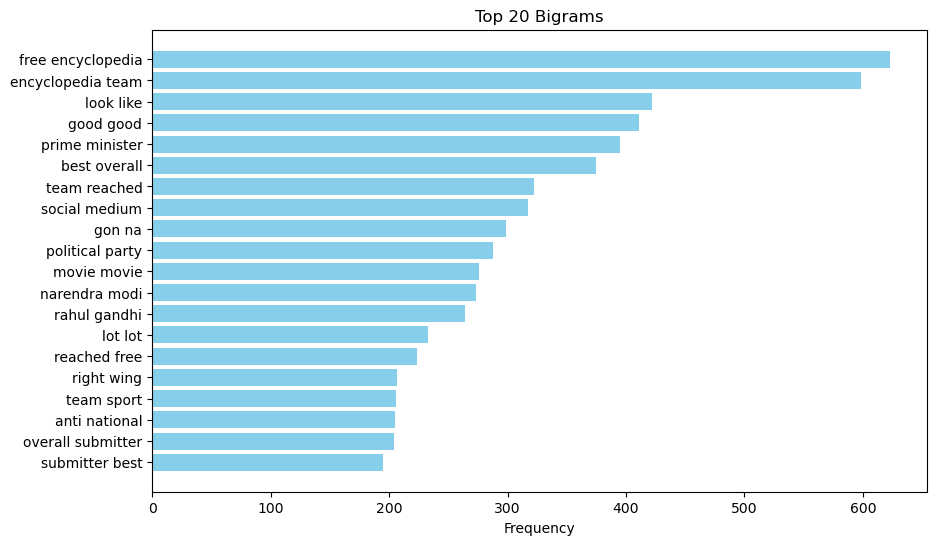

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

texts = df['processed_text'].fillna('')

# Creating bigram vectorizer (2-word phrases)
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=30, stop_words='english')
X_bigrams = bigram_vectorizer.fit_transform(texts)

bigram_counts = np.array(X_bigrams.sum(axis=0)).flatten()
bigram_features = bigram_vectorizer.get_feature_names_out()

# Sorting bigrams by frequency
top_bigrams = sorted(zip(bigram_features, bigram_counts), key=lambda x: x[1], reverse=True)[:20]

# Separating words and counts for plotting
words, counts = zip(*top_bigrams)

plt.figure(figsize=(10,6))
plt.barh(words[::-1], counts[::-1], color='skyblue')
plt.title("Top 20 Bigrams")
plt.xlabel("Frequency")
plt.show()

###  Extract and plot top trigrams

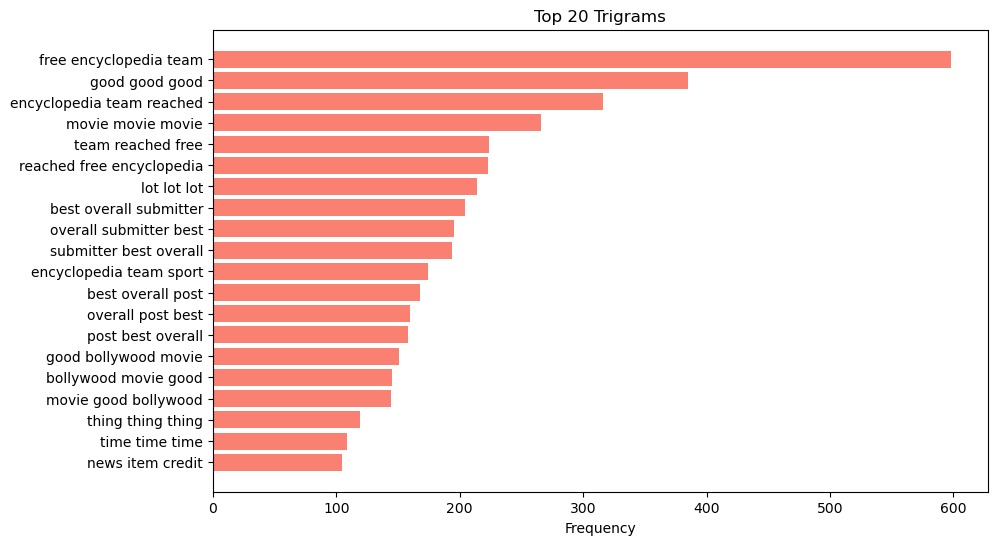

In [8]:
# Create trigram vectorizer (3-word phrases)
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), max_features=30, stop_words='english')
X_trigrams = trigram_vectorizer.fit_transform(texts)

trigram_counts = np.array(X_trigrams.sum(axis=0)).flatten()
trigram_features = trigram_vectorizer.get_feature_names_out()

top_trigrams = sorted(zip(trigram_features, trigram_counts), key=lambda x: x[1], reverse=True)[:20]

words, counts = zip(*top_trigrams)

plt.figure(figsize=(10,6))
plt.barh(words[::-1], counts[::-1], color='salmon')
plt.title("Top 20 Trigrams")
plt.xlabel("Frequency")
plt.show()

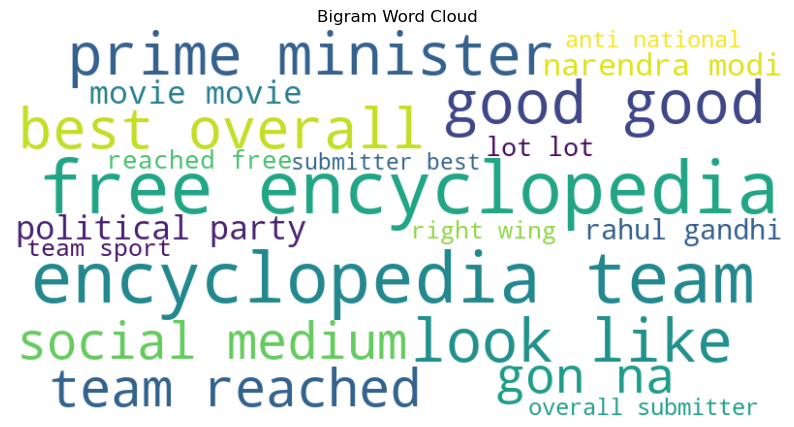

In [11]:
from wordcloud import WordCloud

bigram_dict = dict(top_bigrams)

wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_dict)

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Bigram Word Cloud')
plt.show()